<a href="https://colab.research.google.com/github/VanBap/Adverse_Weather/blob/master/Adverse_weather_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ngô Hoàng Khánh Văn - 20021599

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image


import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import pathlib
import pandas as pd

**Kết nối với GGDRIVE**

In [ ]:
# Run this cell if u can't mount ur drive automatically
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. DATA**

In [ ]:
train_data_dir = '/content/drive/MyDrive/KHOA_LUAN/DATASET_splitted/train'
valid_data_dir = '/content/drive/MyDrive/KHOA_LUAN/DATASET_splitted/val'
test_data_dir = '/content/drive/MyDrive/KHOA_LUAN/DATASET_splitted/test'

# 5-fold cross validation
# train_data_dir = '/content/drive/MyDrive/DATASET_5_fold_splitted/train'
# test_data_dir = '/content/drive/MyDrive/DATASET_5_fold_splitted/test'


Hiển thị số lượng ảnh có và nhãn của chúng (tên folder)

In [ ]:
num_images = len(os.listdir(train_data_dir))
print("Number of sub folder:", num_images)
subfolders = ['Sunrise', 'Snowy', 'Shine', 'Sandy', 'Rainy', 'Fog', 'Cloudy']

# Tạo biến để lưu tổng số ảnh
total_images_1 = 0
# Đếm số lượng ảnh trong mỗi thư mục con và tính tổng
for subfolder in subfolders:
    subfolder_path = os.path.join(train_data_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Number of images in {subfolder}: {num_images}")
    total_images_1 += num_images
# In tổng số ảnh
print("Total number of train images:", total_images_1)

print("============================================")

num_images = len(os.listdir(valid_data_dir))
print("Images in train folder")
print("Number of sub folder:", num_images)
subfolders = ['Sunrise', 'Snowy', 'Shine', 'Sandy', 'Rainy', 'Fog', 'Cloudy']
# Tạo biến để lưu tổng số ảnh
total_images_2 = 0
# Đếm số lượng ảnh trong mỗi thư mục con và tính tổng
for subfolder in subfolders:
    subfolder_path = os.path.join(valid_data_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Number of images in {subfolder}: {num_images}")
    total_images_2  += num_images
# In tổng số ảnh
print("Total number of valid images:", total_images_2 )

print("============================================")

num_images = len(os.listdir(test_data_dir))
print("Images in train folder")
print("Number of sub folder:", num_images)
subfolders = ['Sunrise', 'Snowy', 'Shine', 'Sandy', 'Rainy', 'Fog', 'Cloudy']
# Tạo biến để lưu tổng số ảnh
total_images_3 = 0
# Đếm số lượng ảnh trong mỗi thư mục con và tính tổng
for subfolder in subfolders:
    subfolder_path = os.path.join(test_data_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Number of images in {subfolder}: {num_images}")
    total_images_3 += num_images
# In tổng số ảnh
print("Total number of test images:", total_images_3)

print("============================================")

final = total_images_3+total_images_2+total_images_1
print(f"TOTAL IMAGES:{final}")

Number of sub folder: 7
Number of images in Sunrise: 214
Number of images in Snowy: 122
Number of images in Shine: 151
Number of images in Sandy: 193
Number of images in Rainy: 249
Number of images in Fog: 180
Number of images in Cloudy: 180
Total number of train images: 1289
Images in train folder
Number of sub folder: 7
Number of images in Sunrise: 71
Number of images in Snowy: 40
Number of images in Shine: 50
Number of images in Sandy: 64
Number of images in Rainy: 83
Number of images in Fog: 60
Number of images in Cloudy: 60
Total number of valid images: 428
Images in train folder
Number of sub folder: 7
Number of images in Sunrise: 72
Number of images in Snowy: 42
Number of images in Shine: 52
Number of images in Sandy: 66
Number of images in Rainy: 83
Number of images in Fog: 60
Number of images in Cloudy: 60
Total number of test images: 435
TOTAL IMAGES:2152


Hiển thị thử 1 ảnh

In [ ]:
import PIL
import pathlib
train_data_dir = pathlib.Path(train_data_dir)
print(train_data_dir)
weather = list(train_data_dir.glob('Snowy/*'))
print(weather[0])
PIL.Image.open(weather[0])


* **Image processing**

In [ ]:
img_height, img_width = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
# tạo dữ liệu tăng cường: xoay ảnh = 0.2; phóng to = 0.2; lật ảnh ngang; giữ 40% cho validation

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical')
    #subset='training') # set as training data

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical')
    #subset='validation') # set as validation data

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size = 1,
    class_mode='categorical')
    #subset='validation') # set as testing data

train_generator.class_indices
valid_generator.class_indices
test_generator.class_indices

Found 1289 images belonging to 7 classes.
Found 428 images belonging to 7 classes.
Found 435 images belonging to 7 classes.


{'Cloudy': 0,
 'Fog': 1,
 'Rainy': 2,
 'Sandy': 3,
 'Shine': 4,
 'Snowy': 5,
 'Sunrise': 6}

* **5 fold cross validation (Chưa làm được)**


In [ ]:
# from sklearn.model_selection import KFold
# # Khởi tạo đối tượng KFold với 5 folds
# img_height, img_width = (224, 224)
# batch_size = 32

# i = 1
# df_metrics = pd.DataFrame()
# print(df_metrics.shape)
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_index, test_index in kf.split(dataframe):
#   trainData = dataframe.iloc[train_index]
#   testData = dataframe.iloc[test_index]
#   print('Initializing Kfold %s'%str(i))
#   print('Train shape:',trainData.shape)
#   print('Test shape:',testData.shape)
#   epochs = 30

#   # tạo dữ liệu tăng cường: xoay ảnh = 0.2; phóng to = 0.2; lật ảnh ngang; giữ 40% cho validation
#   train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                               shear_range=0.2,
#                               zoom_range=0.2,
#                               horizontal_flip=True,
#                               validation_split=0.4)

#   test_datagen = ImageDataGenerator(rescale=1. / 255)

#   train_generator=train_datagen.flow_from_dataframe(
#   dataframe=trainData,
#   directory=train_data_dir,
#   x_col="id",
#   y_col="label",
#   subset="training",
#   batch_size=batch_size,
#   shuffle=True,
#   class_mode="categorical",
#   target_size=(img_width, img_height))

#   validation_generator=train_datagen.flow_from_dataframe(
#   dataframe=trainData,
#   directory=train_data_dir,
#   x_col="id",
#   y_col="label",
#   subset="validation",
#   batch_size=batch_size,
#   shuffle=True,
#   class_mode="categorical",
#   target_size=(img_width, img_height))

#   test_generator=test_datagen.flow_from_dataframe(
#   dataframe=testData,
#   directory=test_data_dir,
#   x_col="id",
#   y_col="label",
#   batch_size=1,
#   shuffle=False,
#   class_mode="categorical",
#   target_size=(img_width, img_height)
#   )
#   i +=1

In [ ]:
# from sklearn.model_selection import KFold
# # Khởi tạo đối tượng KFold với 5 folds
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Lặp qua từng fold
# for fold, (train_index, val_index) in enumerate(kf.split(train_generator.filenames)):
#     print(f"Fold {fold + 1}")

#     # Tạo mô hình mới cho mỗi fold
#     model = get_model()

#     # Khởi tạo iterator cho train_generator và valid_generator
#     train_iterator = iter(train_generator)
#     val_iterator = iter(valid_generator)

#     # Lặp qua từng index trong fold
#     for i in train_index:
#         next(train_iterator)  # Bỏ qua các batch cho đến khi đạt đến index cần thiết

#     for i in val_index:
#         next(val_iterator)  # Bỏ qua các batch cho đến khi đạt đến index cần thiết

#     # Trích xuất dữ liệu từ generator cho fold hiện tại
#     train_data = next(train_iterator)
#     val_data = next(val_iterator)

#     # Huấn luyện mô hình
#     model.fit(train_data, epochs=10, validation_data=val_data)

#     # Đánh giá mô hình trên tập test
#     test_loss, test_acc = model.evaluate(test_generator)
#     print(f"Test accuracy for fold {fold + 1}: {test_acc}")



Truy cập thử thuộc tính của hình ảnh trong test_dir


In [ ]:
x = test_generator[8][0]
y = test_generator[8][1]

# input shape + output shape cua model.h5
print("image' shape: ", x.shape)    # image input (matrix)
print("label'shape: ", y.shape)     # label one-hot encoding
print(y)

image' shape:  (1, 224, 224, 3)
label'shape:  (1, 7)
[[0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
train_generator.samples

1289

**2. Train Model**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
# base_model = ResNet50(include_top=False, weights='imagenet')
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(train_generator.num_classes, activation='softmax')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

#def get_model():
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet'))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.summary()
model.layers[0].trainable= False
# for layer in base_model.layers:
#   layer.trainable = False

# Khởi tạo Adam optimizer
optimizer = Adam()

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['accuracy'])

#model.fit(train_generator, epochs=10)
n_train_steps = train_generator.n #train_generator.batch_size
n_valid_steps = valid_generator.n #valid_generator.batch_size

checkpoint = ModelCheckpoint("/content/drive/MyDrive/KHOA_LUAN/saved_model/my_model-" + "-loss-{val_loss:.2f}-acc-{val_accuracy:.2f}.h5", save_best_only=True, verbose=1)

epoch_number = 20

history=model.fit_generator(generator=train_generator,
                  steps_per_epoch=train_generator.samples//batch_size,
                  validation_data=valid_generator,
                  validation_steps=valid_generator.samples//batch_size,
                  epochs=epoch_number,
                  callbacks=[ checkpoint]
)
  #return model

**Save model**

In [ ]:
model.save('/content/drive/MyDrive/KHOA_LUAN/saved_model/ResNet50_Weather_epoch20.h5')


**Load model**

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/KHOA_LUAN/saved_model/ResNet50_Weather_epoch20.h5')


VẼ ĐỒ THỊ LOSS VÀ ACCURACY


In [ ]:
import matplotlib.pyplot as pyplot

# plot loss và accuracy
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val', marker='o')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()


Ghi kết quả train vào file training.txt

In [ ]:
# Kiểm tra xem file đã tồn tại chưa
import os
file_exists = os.path.isfile('/content/drive/MyDrive/KHOA_LUAN/training_history.txt')

# Lưu accuracy và loss vào file (ghi đè hoặc thêm mới)
with open('/content/drive/MyDrive/KHOA_LUAN/training_history.txt', 'a' if file_exists else 'w') as f:
    if not file_exists:
        f.write('epoch,   loss, accuracy, val_loss, val_accuracy\n')
    for epoch in range(epoch_number):  # Vì đã thiết lập epochs=10 ở trên
        f.write(f"{epoch + 1}    ,{history.history['loss'][epoch]:.6f},{history.history['accuracy'][epoch]:.6f},{history.history['val_loss'][epoch]:.6f},{history.history['val_accuracy'][epoch]:.6f}\n")


**3. Đánh giá Test**

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/KHOA_LUAN/saved_model/ResNet50_Weather_epoch20.h5')
 # Test và in kết quả
test_loss, test_acc = model.evaluate(test_generator, verbose = 2)
print('\nTest accuracy', test_acc)

435/435 - 141s - loss: 0.3862 - accuracy: 0.9057 - 141s/epoch - 324ms/step

Test accuracy 0.90574711561203


Ghi vào file training.txt

In [ ]:
file_exists = os.path.isfile('/content/drive/MyDrive/KHOA_LUAN/training_history.txt')

# Mở file để ghi (nếu file chưa tồn tại, sẽ được tạo mới)
with open('/content/drive/MyDrive/KHOA_LUAN/training_history.txt', 'a') as f:
    # Ghi accuracy và loss vào file
    f.write(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}\n')

Hiển thị thử kết quả dự đoán

1/1 [==============================] - 0s 465ms/step


{'Cloudy': 0, 'Fog': 1, 'Rainy': 2, 'Sandy': 3, 'Shine': 4, 'Snowy': 5, 'Sunrise': 6}
Answer:  2
Answer:  Rainy


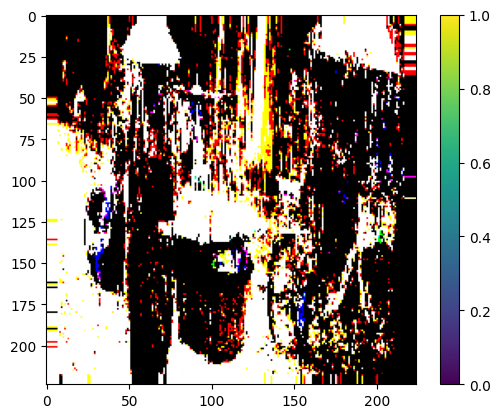

In [ ]:
# Select only the input data from test_generator[8]
x = test_generator[18][0]

# Predict using the model
predictions = model.predict(x)
print(test_generator.class_indices)

print("Answer: ", np.argmax(predictions))
for i, j in test_generator.class_indices.items(): # i la keys, j la values
  if j == np.argmax(predictions) :
    print("Answer: ", i)

plt.figure()
plt.imshow(x[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Vẽ Confusion matrix dự đoán các ảnh trong folder test**

1/1 [==============================] - 0s 202ms/step


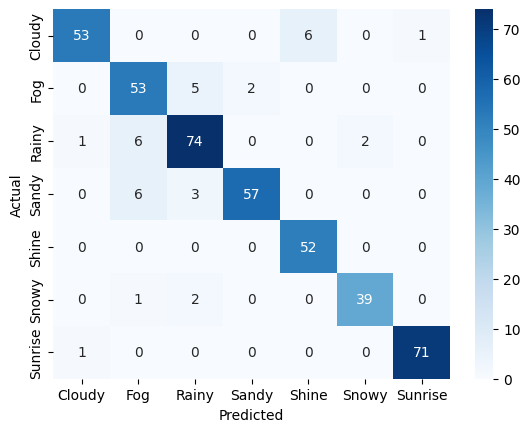

test accuracy : 91.72413793103448


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/KHOA_LUAN/saved_model/ResNet50_Weather_epoch20.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()

# lấy input, output mong muốn -> nhét kết quả dự đoán vào y_prob, output mong muốn vào y_actual
for _ in range(nb_samples):
  X_test, Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class =  [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

TÍNH TOÁN CONFUSION MATIRIX, PRECISION, RECALL VÀ F1-SCORE


In [ ]:
print(predicted_class)
#print(y_act)


['Snowy', 'Fog', 'Fog', 'Sunrise', 'Sandy', 'Sandy', 'Fog', 'Snowy', 'Snowy', 'Sunrise', 'Cloudy', 'Fog', 'Rainy', 'Fog', 'Shine', 'Snowy', 'Cloudy', 'Sandy', 'Rainy', 'Sunrise', 'Cloudy', 'Sunrise', 'Cloudy', 'Sandy', 'Shine', 'Cloudy', 'Fog', 'Shine', 'Sandy', 'Shine', 'Sunrise', 'Sandy', 'Sandy', 'Sandy', 'Shine', 'Sandy', 'Cloudy', 'Rainy', 'Rainy', 'Shine', 'Shine', 'Rainy', 'Rainy', 'Shine', 'Rainy', 'Cloudy', 'Sunrise', 'Sunrise', 'Sunrise', 'Rainy', 'Sandy', 'Cloudy', 'Shine', 'Sandy', 'Rainy', 'Cloudy', 'Sunrise', 'Fog', 'Shine', 'Sunrise', 'Shine', 'Fog', 'Cloudy', 'Sandy', 'Sunrise', 'Sunrise', 'Fog', 'Snowy', 'Rainy', 'Cloudy', 'Sunrise', 'Snowy', 'Sunrise', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Shine', 'Fog', 'Rainy', 'Rainy', 'Cloudy', 'Rainy', 'Sandy', 'Rainy', 'Fog', 'Fog', 'Sandy', 'Sunrise', 'Sandy', 'Sandy', 'Snowy', 'Snowy', 'Rainy', 'Cloudy', 'Snowy', 'Sunrise', 'Sandy', 'Sunrise', 'Rainy', 'Fog', 'Rainy', 'Sandy', 'Sandy', 'Shine', 'Cloudy', 'Rainy', 'Snowy', 'R

In [ ]:
#Now we calculate the Accuracy, Precision, Recall, and F1 Score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#Each function of above uses two 1D array, So we use y and y_pred
print("Accuracy: ",accuracy_score(y_act,y_prob))
print("Precision: ",precision_score(y_act,y_prob))
print("Recall: ",recall_score(y_act,y_prob))
print("F1 Score: ",f1_score(y_act,y_prob))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Calculate: Precision / Recall / F1
print(classification_report(y_act, y_prob))

In [ ]:
y_hat = model.predict(test_generator[:][0])
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(test_generator[:][1], axis=1)


# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

TypeError: '>=' not supported between instances of 'slice' and 'int'